In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
dataset=pd.read_csv("uber_data.csv")
dataset.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23/03/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29/11/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,23/08/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,21/10/2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,16/09/2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [42]:
# Merging date and time
dataset["DateTime"]=pd.to_datetime(dataset["Date"]+" "+dataset["Time"],format="%d/%m/%Y %H:%M:%S")
dataset.drop(columns=["Date","Time"],inplace=True)

In [43]:
#filling data in Avg VTAT and Avg CTAT
completed_mask = dataset['Booking Status'] == 'Completed'
cancelled_mask = dataset['Booking Status'] != 'Completed'

for col in ['Avg VTAT', 'Avg CTAT']:
    median_value = dataset.loc[completed_mask, col].median()
    dataset.loc[completed_mask, col] = dataset.loc[completed_mask, col].fillna(median_value)
    dataset.loc[cancelled_mask, col] = dataset.loc[cancelled_mask, col].fillna(0)
    
dataset["Cancelled Rides by Customer"]=dataset["Cancelled Rides by Customer"].fillna(0)
dataset["Cancelled Rides by Driver"]=dataset["Cancelled Rides by Driver"].fillna(0)


dataset["Reason for cancelling by Customer"]=dataset["Reason for cancelling by Customer"].fillna("No cancellation")
dataset["Driver Cancellation Reason"]=dataset["Driver Cancellation Reason"].fillna("No cancellation")

dataset["Incomplete Rides"]=dataset["Incomplete Rides"].fillna(0)
dataset["Incomplete Rides Reason"]=dataset["Incomplete Rides Reason"].fillna("No Incomplete Ride")


dataset["Booking Value"]=dataset["Booking Value"].fillna(0)
dataset["Ride Distance"]=dataset["Ride Distance"].fillna(0)


dataset["Driver Ratings"]=dataset["Driver Ratings"].fillna(dataset["Driver Ratings"].median())
dataset["Customer Rating"]=dataset["Customer Rating"].fillna(dataset["Customer Rating"].median())

dataset["Payment Method"]=dataset["Payment Method"].fillna("No Payment")

In [44]:
#Rides per day (avg)

dataset["Date"]=dataset["DateTime"].dt.date
rides_per_day=dataset.groupby("Date").size().reset_index(name="Ride Count")
rides_per_day["Ride Count"].mean()

410.958904109589

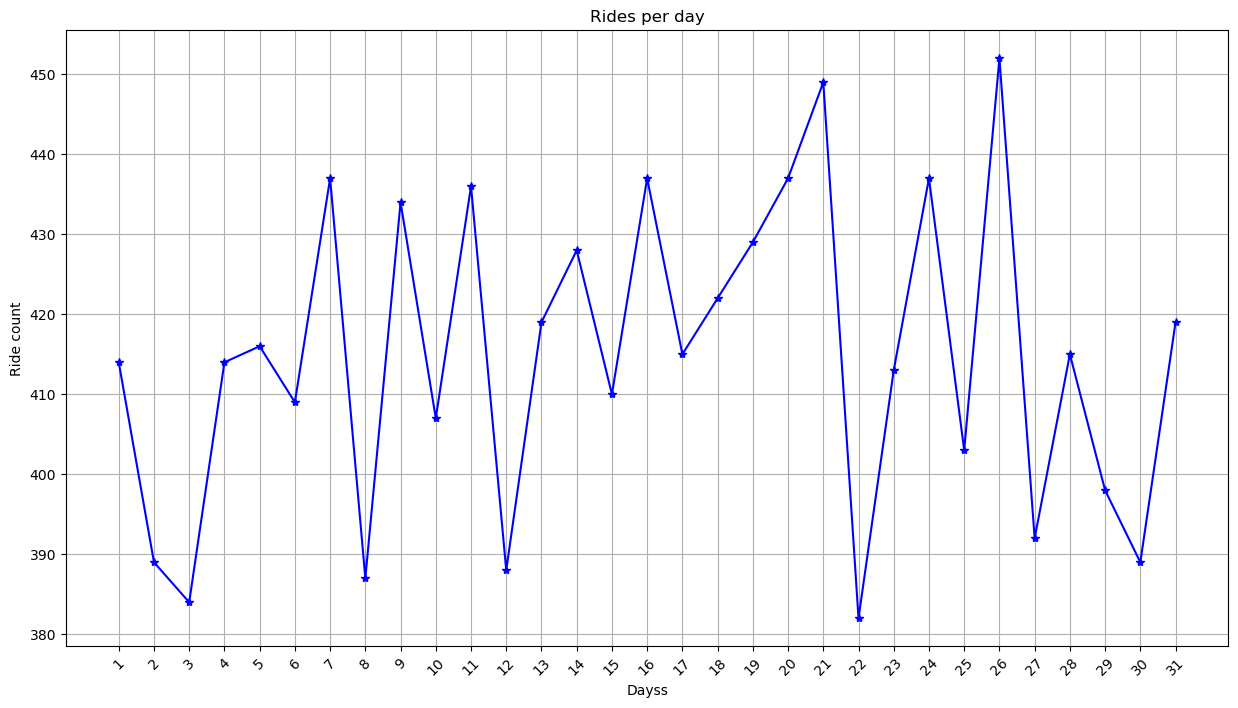

In [45]:
dataset["Month"]=dataset["DateTime"].dt.month
jan_data=dataset[dataset["Month"]==1]
rides_per_day_jan=jan_data.groupby("Date").size().reset_index(name="Ride Count")
rides_per_day_jan["Date"] = pd.to_datetime(rides_per_day_jan["Date"])
rides_per_day_jan["Day"]=rides_per_day_jan["Date"].dt.day
plt.figure(figsize=(15,8))
plt.plot(rides_per_day_jan["Day"],rides_per_day_jan["Ride Count"],marker="*",linestyle="-",color="b")
plt.title("Rides per day")
plt.xlabel("Dayss")
plt.ylabel("Ride count")
plt.xticks(rides_per_day_jan["Day"],rotation=45)
plt.grid(True)
plt.show()


In [46]:
#Rides per week(avg)
dataset["Year"] = dataset["DateTime"].dt.year
dataset["Week"] = dataset["DateTime"].dt.isocalendar().week

# Group by Year & Week
rides_per_week = dataset.groupby(["Year","Week"]).size().reset_index(name="Ride Count")

# Create a combined column for plotting (e.g. "2024-W10")
rides_per_week["YearWeek"] = rides_per_week["Year"].astype(str) + "-W" + rides_per_week["Week"].astype(str)

rides_per_week["Ride Count"].mean()

2884.6153846153848

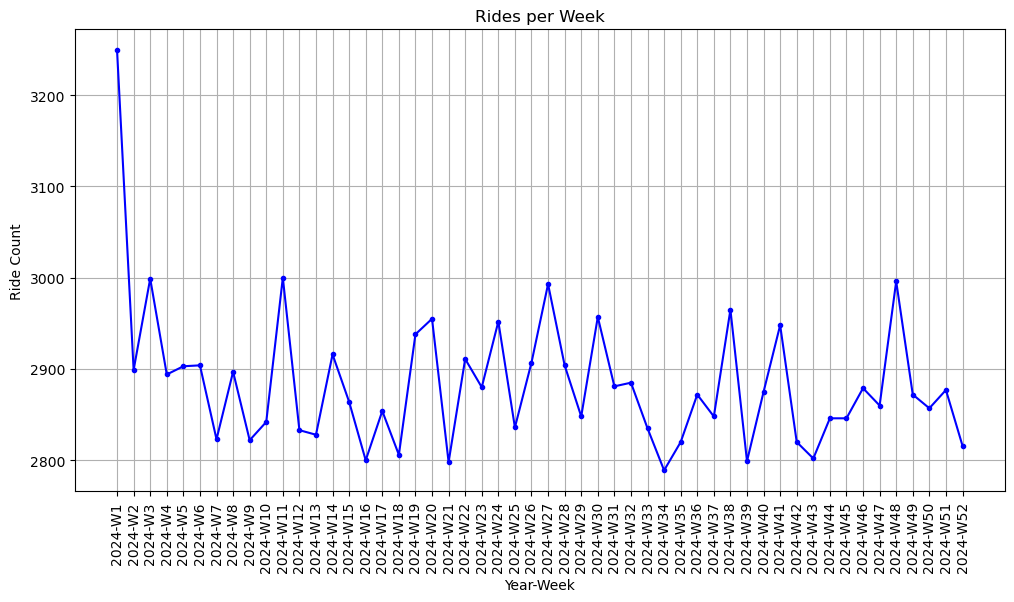

In [47]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(rides_per_week["YearWeek"], rides_per_week["Ride Count"], marker=".", linestyle="-", color="b")
plt.title("Rides per Week")
plt.xlabel("Year-Week")
plt.ylabel("Ride Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [48]:
#Rides per month(avg)

rides_per_month=dataset.groupby("Month").size().reset_index(name="Ride count")
rides_per_month["Ride count"].mean()

12500.0

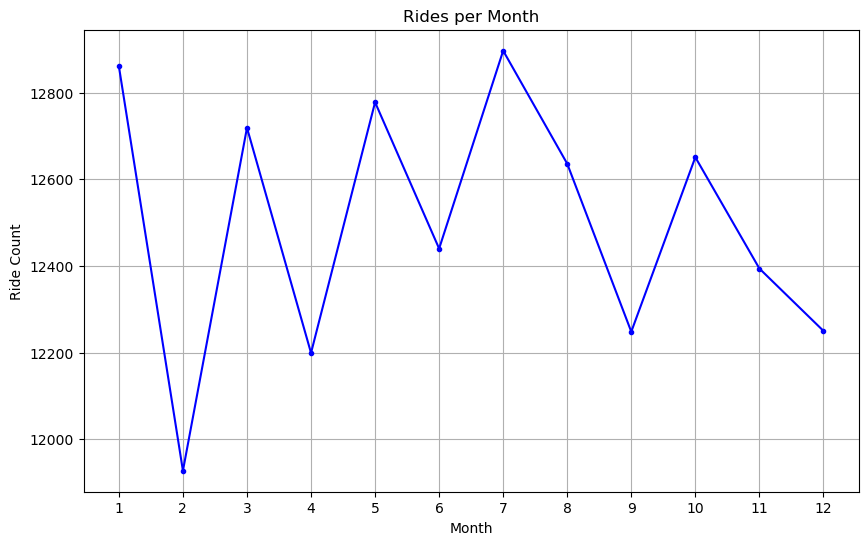

In [49]:
plt.figure(figsize=(10,6))
plt.plot(rides_per_month["Month"],rides_per_month["Ride count"],marker=".",linestyle="-",color="b")
plt.title("Rides per Month")
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.xticks(rides_per_month["Month"])
plt.grid(True)
plt.show()


In [50]:
dataset["Hour"]=dataset["DateTime"].dt.hour
rides_per_hour=dataset.groupby("Hour").size().reset_index(name="Rides count")
# rides_per_hour=rides_per_hour.sort_values(by="Rides count",ascending=False)

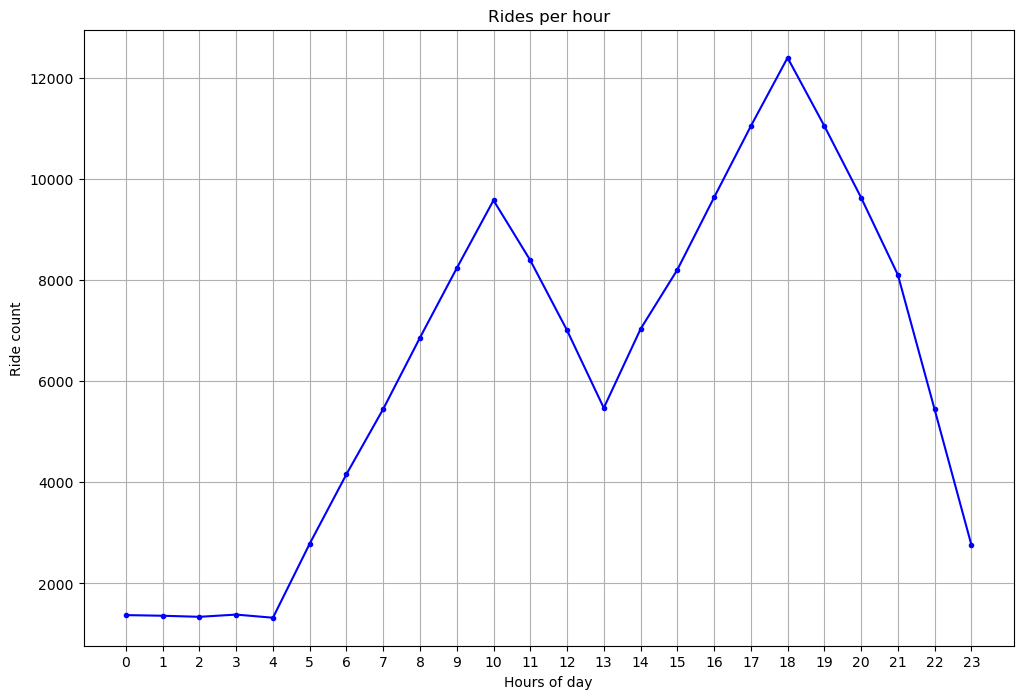

In [51]:
plt.figure(figsize=(12,8))
plt.plot(rides_per_hour["Hour"],rides_per_hour["Rides count"],marker=".",color="blue")
plt.title("Rides per hour")
plt.xlabel("Hours of day")
plt.ylabel("Ride count")
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [52]:
#most picked location
most_loc=dataset.groupby("Pickup Location").size().reset_index(name="Location Count")
most_loc=most_loc.sort_values(by="Location Count",ascending=False)
most_loc.head(1)

,Pickup Location,Location Count
80,Khandsa,949


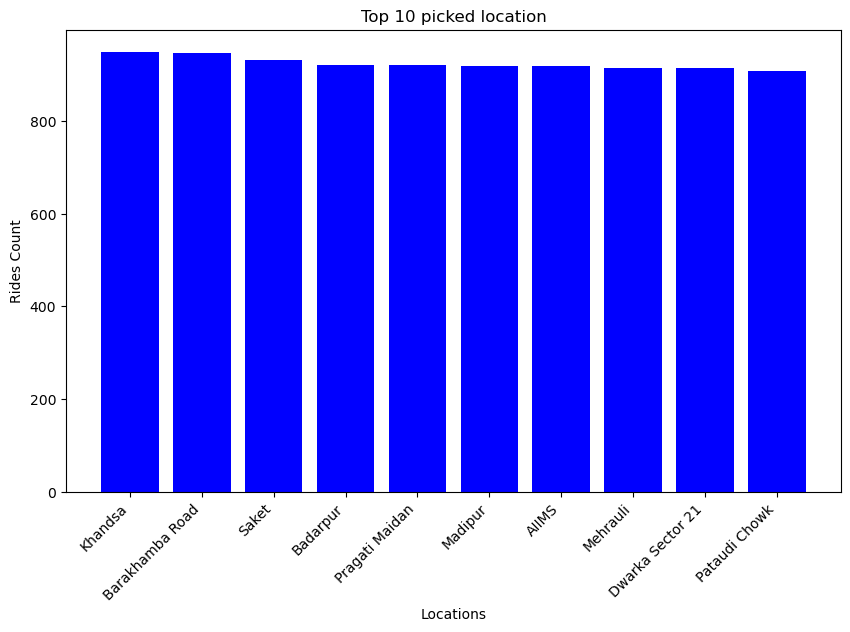

In [53]:
top10_picks=most_loc.head(10)
plt.figure(figsize=(10,6))
plt.bar(top10_picks["Pickup Location"],top10_picks["Location Count"],color="blue")
plt.title("Top 10 picked location")
plt.xlabel("Locations")
plt.ylabel("Rides Count")
plt.xticks(rotation=45,ha="right")
plt.show()


In [54]:
dataset["Cancelled Rides by Customer"].unique()

array([0., 1.])

In [55]:
total_rides_cancelled_by_customers=dataset["Cancelled Rides by Customer"].mean()*100
total_rides_cancelled_by_customers

7.000000000000001

In [56]:
total_rides_cancelled_by_driver=dataset["Cancelled Rides by Driver"].mean()*100
total_rides_cancelled_by_driver

18.0

In [57]:
dataset["Reason for cancelling by Customer"].unique()

array(['No cancellation', 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [58]:
most_common_reason_for_cancelation_by_customer=(
    dataset[dataset["Reason for cancelling by Customer"]!="No cancellation"]
    .groupby("Reason for cancelling by Customer")
    .size()
    .reset_index(name="Reason count")
    .sort_values(by="Reason count",ascending=False))
most_common_reason_for_cancelation_by_customer.head(1)

,Reason for cancelling by Customer,Reason count
4,Wrong Address,2362


In [59]:
most_common_reason_for_cancelation_by_driver=(
    dataset[dataset["Driver Cancellation Reason"]!="No cancellation"]
    .groupby("Driver Cancellation Reason")
    .size()
    .reset_index(name="Reason count")
    .sort_values(by="Reason count",ascending=False)
)
most_common_reason_for_cancelation_by_driver.head(1)


,Driver Cancellation Reason,Reason count
0,Customer related issue,6837


In [60]:
#incomplete rate vary by Vehicle Type
total_vehicle_type_count=dataset.groupby("Vehicle Type").size().reset_index(name="Vehicle Type Count")
incomplete_ride=dataset[dataset["Booking Status"]=="Incomplete"].groupby("Vehicle Type").size().reset_index(name="Ride Cancle Count")
incomplete_rate_vary_by_vehicle_type=total_vehicle_type_count.merge(incomplete_ride,on="Vehicle Type",how="left")
incomplete_rate_vary_by_vehicle_type["Cancellation rate in %"]=(incomplete_rate_vary_by_vehicle_type["Ride Cancle Count"]/incomplete_rate_vary_by_vehicle_type["Vehicle Type Count"])*100
incomplete_rate_vary_by_vehicle_type=incomplete_rate_vary_by_vehicle_type.sort_values(by="Cancellation rate in %",ascending=False)
incomplete_rate_vary_by_vehicle_type

,Vehicle Type,Vehicle Type Count,Ride Cancle Count,Cancellation rate in %
2,Go Mini,29806,1815,6.089378
3,Go Sedan,27141,1642,6.049888
0,Auto,37419,2260,6.039712
6,eBike,10557,630,5.967604
1,Bike,22517,1328,5.897766
5,Uber XL,4449,262,5.888964
4,Premier Sedan,18111,1063,5.869361


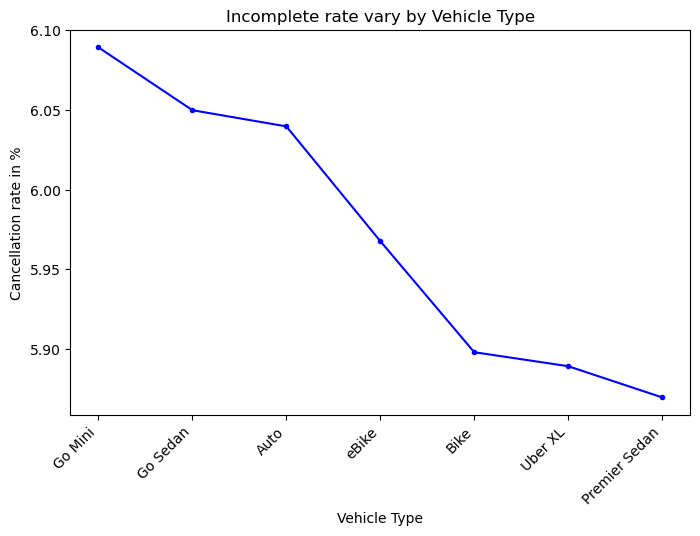

In [61]:
plt.figure(figsize=(8,5))
plt.plot(incomplete_rate_vary_by_vehicle_type["Vehicle Type"],incomplete_rate_vary_by_vehicle_type["Cancellation rate in %"],marker=".",color="blue")
plt.title("Incomplete rate vary by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Cancellation rate in %")
plt.xticks(rotation=45,ha="right")
plt.show()

In [62]:
total_ride_per_location=dataset.groupby("Pickup Location").size().reset_index(name="Total Ride Count/Loc")
incomplete_rides_per_location=dataset[dataset["Booking Status"]=="Incomplete"].groupby("Pickup Location").size().reset_index(name="Incomplete rides per Loc")
incomplete_rides_rate_per_location=total_ride_per_location.merge(incomplete_rides_per_location,on="Pickup Location",how="left")
incomplete_rides_rate_per_location["Incomplete rate in %"]=(incomplete_rides_rate_per_location["Incomplete rides per Loc"]/incomplete_rides_rate_per_location["Total Ride Count/Loc"])*100
incomplete_rides_rate_per_location=incomplete_rides_rate_per_location.sort_values(by="Incomplete rate in %",ascending=False)
incomplete_ride_top10_loc=incomplete_rides_rate_per_location.head(10)

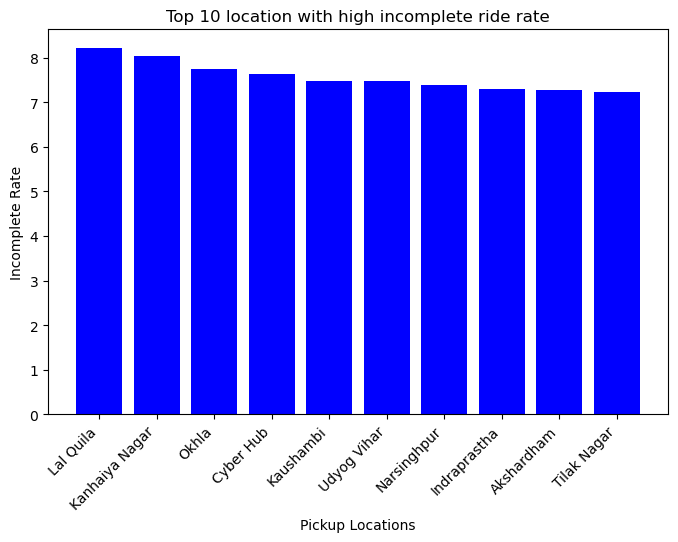

In [63]:
plt.figure(figsize=(8,5))
plt.bar(incomplete_ride_top10_loc["Pickup Location"],incomplete_ride_top10_loc["Incomplete rate in %"],color="blue")
plt.title("Top 10 location with high incomplete ride rate")
plt.xlabel("Pickup Locations")
plt.ylabel("Incomplete Rate")
plt.xticks(rotation=45,ha="right")
plt.show()

In [64]:
#total booking value per month
total_booking_value_per_month=dataset.groupby("Month")["Booking Value"].sum().reset_index()
total_booking_value_per_month["Booking Value"]=total_booking_value_per_month["Booking Value"]/100000

[]

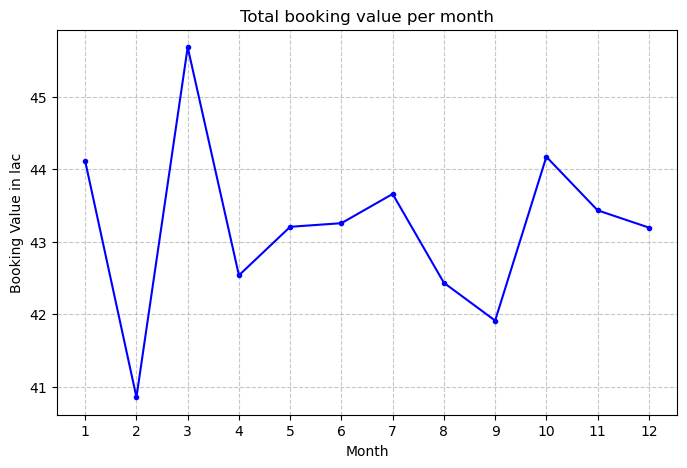

In [65]:
plt.figure(figsize=(8,5))
plt.plot(total_booking_value_per_month["Month"],total_booking_value_per_month["Booking Value"],marker=".",color="blue")
plt.title("Total booking value per month")
plt.xlabel("Month")
plt.ylabel("Booking Value in lac")
plt.xticks(total_booking_value_per_month["Month"])
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.plot()

In [66]:
#Vehicle that generates highest revenue
vehicle_with_booking_value=dataset.groupby("Vehicle Type")["Booking Value"].sum().reset_index()
vehicle_with_booking_value=vehicle_with_booking_value.sort_values(by="Booking Value",ascending=False)
vehicle_with_booking_value["Revenue in lac"]=vehicle_with_booking_value["Booking Value"]/100000
vehicle_with_booking_value.head(1)

,Vehicle Type,Booking Value,Revenue in lac
0,Auto,12878422.0,128.78422


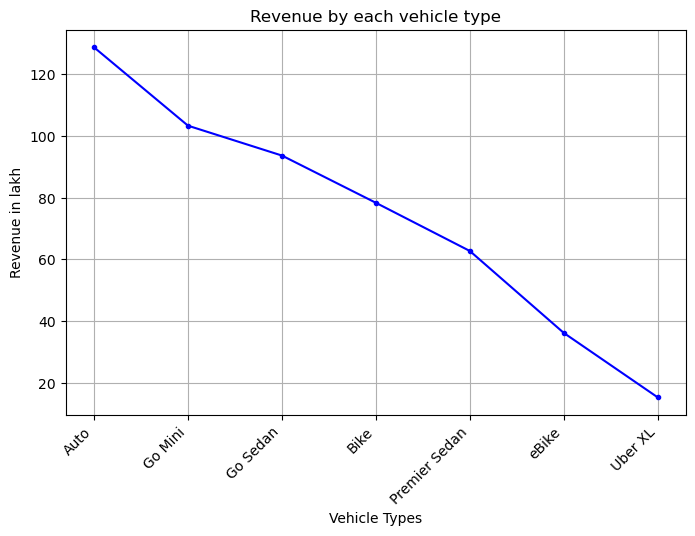

In [67]:
#plotting revenue by vehicle type
plt.figure(figsize=(8,5))
plt.plot(vehicle_with_booking_value["Vehicle Type"],vehicle_with_booking_value["Revenue in lac"],marker=".",color="blue")
plt.title("Revenue by each vehicle type")
plt.xlabel("Vehicle Types")
plt.ylabel("Revenue in lakh")
plt.xticks(rotation=45,ha="right")
plt.grid(True)
plt.show()

In [68]:
#Location that geenrate highest revenue
loc_with_booking_value=dataset.groupby("Pickup Location")["Booking Value"].sum().reset_index()
loc_with_booking_value=loc_with_booking_value.sort_values(by="Booking Value",ascending=False)
loc_with_booking_value.head(1)

,Pickup Location,Booking Value
16,Barakhamba Road,341154.0


In [69]:
#average driver rating per vehicle type
avg_driver_rating_per_vehicle=dataset.groupby("Vehicle Type")["Driver Ratings"].mean().reset_index()
avg_driver_rating_per_vehicle=avg_driver_rating_per_vehicle.sort_values(by="Driver Ratings",ascending=False)
avg_driver_rating_per_vehicle

,Vehicle Type,Driver Ratings
5,Uber XL,4.261430
4,Premier Sedan,4.259533
0,Auto,4.258150
3,Go Sedan,4.258104
1,Bike,4.256406
2,Go Mini,4.255002
6,eBike,4.253841


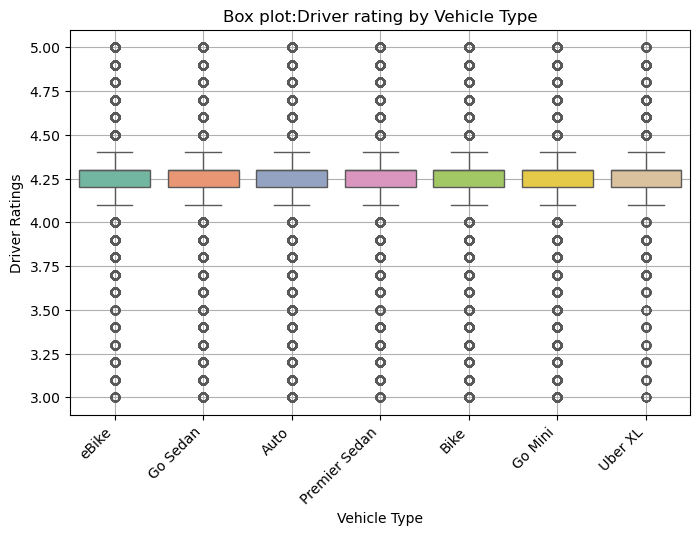

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Vehicle Type",y="Driver Ratings",data=dataset,hue="Vehicle Type",palette="Set2",legend=False)
plt.title("Box plot:Driver rating by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Driver Ratings")
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.show()

In [71]:
#location with low customer rating
location_with_low_customer_rating=dataset.groupby("Pickup Location")["Customer Rating"].mean().reset_index()
location_with_low_customer_rating=location_with_low_customer_rating.sort_values(by="Customer Rating")
location_with_low_customer_rating.head(1)

,Pickup Location,Customer Rating
175,Yamuna Bank,4.403762


In [72]:
#does distance affect customer rating
distance_affect_customer_rating=dataset.groupby("Ride Distance")["Customer Rating"].mean().reset_index()
distance_affect_customer_rating=distance_affect_customer_rating.sort_values(by="Ride Distance",ascending=False)

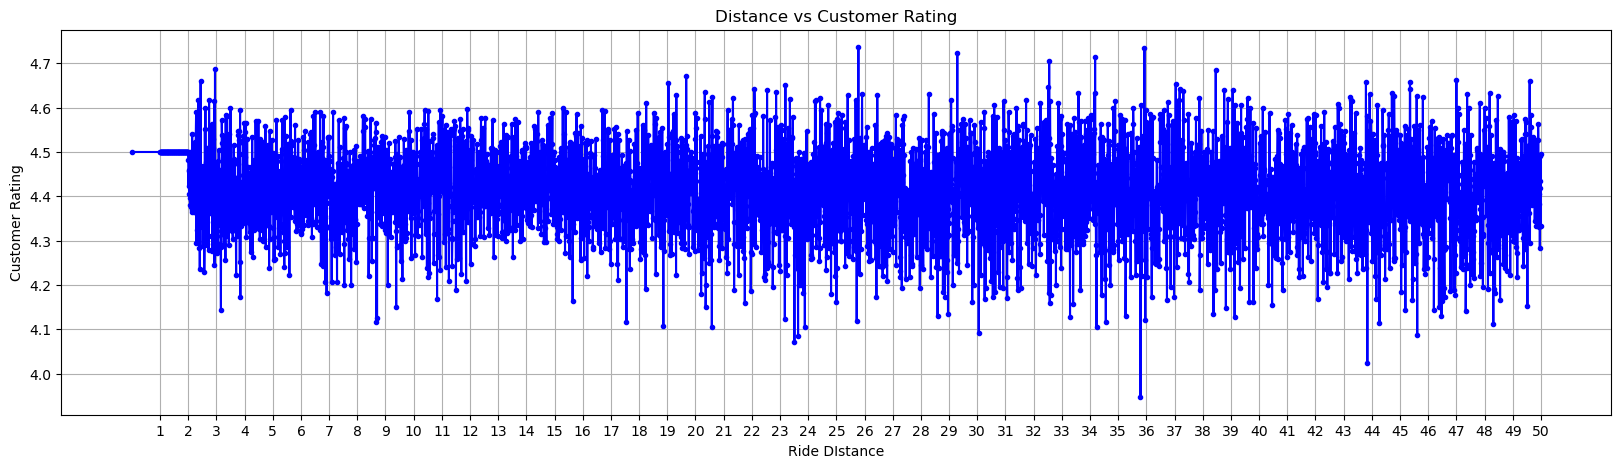

In [73]:
plt.figure(figsize=(20,5))
plt.plot(distance_affect_customer_rating["Ride Distance"],distance_affect_customer_rating["Customer Rating"],marker=".",color="blue")
plt.title("Distance vs Customer Rating")
plt.xlabel("Ride DIstance")
plt.ylabel("Customer Rating")
plt.grid(True)
plt.xticks(range(1,51))
plt.show()

In [74]:
dataset["Delay Type"]=dataset.apply(
    lambda row:"Customer delay" if(row["Avg CTAT"]>row["Avg VTAT"]) else( "Driver Delay" if(row["Avg VTAT"]>row["Avg CTAT"]) else "No Delay"),axis=1
)
delay_summary=dataset.groupby("Delay Type").size().reset_index(name="Ride Count")
delay_summary


,Delay Type,Ride Count
0,Customer delay,101999
1,Driver Delay,37500
2,No Delay,10501
